In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import html, dcc, dash_table
from dash.dependencies import Input, Output

In [2]:
weather_data = pd.read_csv('Datasets/Weather Data in India from 1901 to 2017.csv')
weather_data = weather_data.drop(columns=['Unnamed: 0'])
weather_data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [3]:
# Melt the dataframe to have a long format
weather_data_long = weather_data.melt(id_vars=['YEAR'], var_name='month', value_name='value')

# Convert the 'month' column to datetime format
weather_data_long['Date'] = pd.to_datetime(weather_data_long['YEAR'].astype(str) + '-' + weather_data_long['month'], format='%Y-%b')

# Display the first few rows of the dataframe
weather_data_long.head()


,YEAR,month,value,Date
0,1901,JAN,17.99,1901-01-01
1,1902,JAN,19.00,1902-01-01
2,1903,JAN,18.32,1903-01-01
3,1904,JAN,17.77,1904-01-01
4,1905,JAN,17.40,1905-01-01


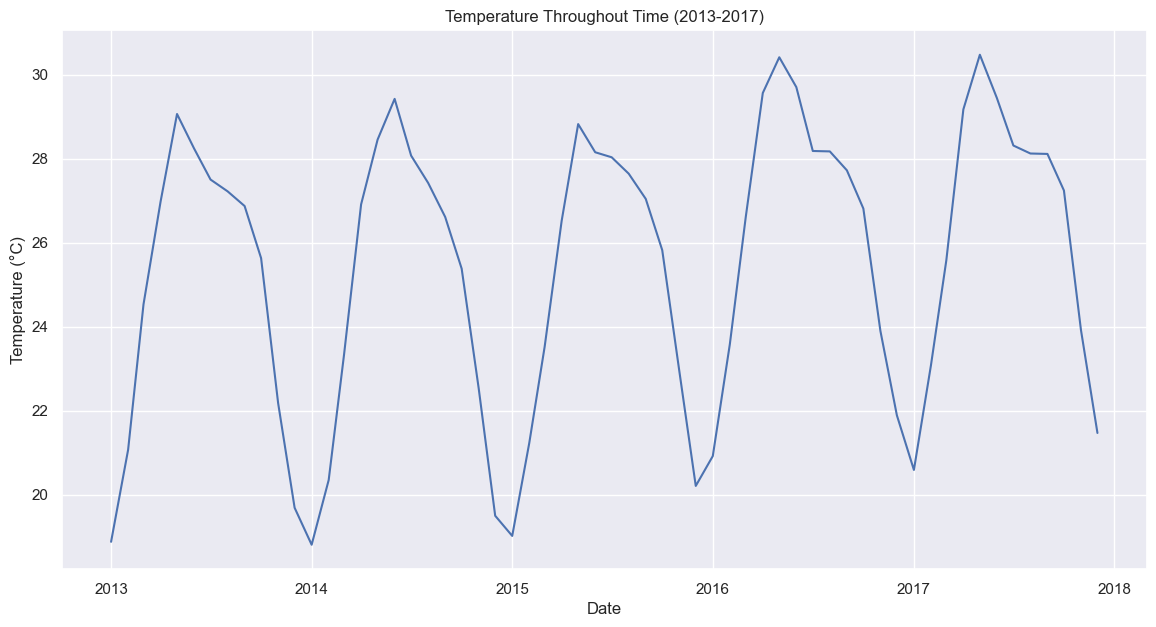

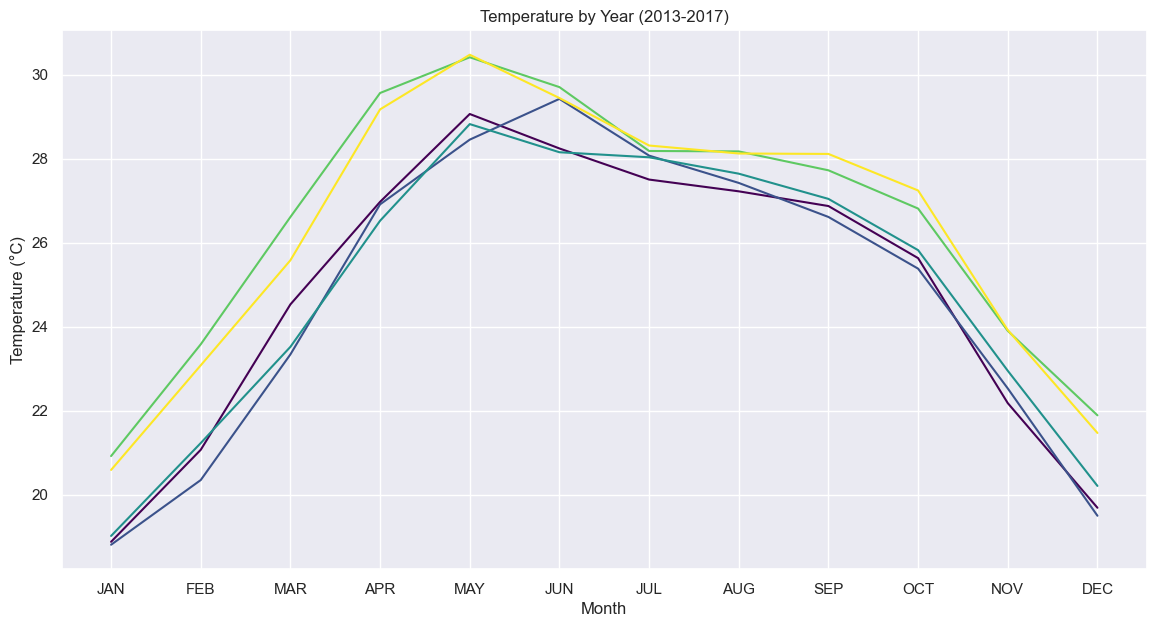

In [4]:
import seaborn as sns

# Set the style for the plots
sns.set(style="darkgrid")

# Filter the data to include only the years 2013 to 2017
filtered_data = weather_data_long[weather_data_long['YEAR'].isin([2013, 2014, 2015, 2016, 2017])]

# Whole view plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='Date', y='value')
plt.title('Temperature Throughout Time (2013-2017)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Year view plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='month', y='value', hue='YEAR', palette='viridis', legend=None)
plt.title('Temperature by Year (2013-2017)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


In [5]:
# box plot for monthly temperature distribution
fig_box = px.box(weather_data_long, x='month', y='value', title='Monthly Temperature Distribution')

# Update the layout for better styling and analysis
fig_box.update_layout(
    xaxis_title='Month',
    yaxis_title='Temperature (°C)',
    template='plotly_dark',
    boxmode='group',
    xaxis=dict(
        tickmode='array',
        tickvals=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
        ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ),
    yaxis=dict(
        title='Temperature (°C)',
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='white'
    ),
    title=dict(
        text='Monthly Temperature Distribution',
        font=dict(size=24, color='white')
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='white'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig_box.show()

In [6]:
# Calculate the mean temperature for each year
mean_temperatures = weather_data.mean(axis=1)

# Find the coldest and hottest years
coldest_year = weather_data.loc[mean_temperatures.idxmin(), 'YEAR']
hottest_year = weather_data.loc[mean_temperatures.idxmax(), 'YEAR']

# Calculate the standard deviation of temperatures for each year
std_temperatures = weather_data.std(axis=1)

# Find the year with the least standard deviation
least_std_year = weather_data.loc[std_temperatures.idxmin(), 'YEAR']
# Print the results
print(f"Coldest Year: {coldest_year}")
print(f"Hottest Year: {hottest_year}")
print(f"Year with Least Standard Deviation: {least_std_year}")

# Find the month with the highest average temperature
warmest_month = weather_data_long.groupby('month')['value'].mean().idxmax()
print(f"Month with the Warmest Day: {warmest_month}")

Coldest Year: 1904
Hottest Year: 2016
Year with Least Standard Deviation: 1901
Month with the Warmest Day: MAY


In [7]:
# Define a color map for each month
color_map = {
    'JAN': 'blue', 'FEB': 'red', 'MAR': 'green', 'APR': 'purple', 'MAY': 'orange', 
    'JUN': 'pink', 'JUL': 'brown', 'AUG': 'gray', 'SEP': 'cyan', 'OCT': 'magenta', 
    'NOV': 'yellow', 'DEC': 'white'
}

# Create a scatter plot for temperature clusters by month
fig_clusters = px.scatter(
    weather_data_long, 
    x='Date', 
    y='value', 
    color='month', 
    title='Temperature Clusters by Month', 
    color_discrete_map=color_map
)

# Update the layout for a modern and stylish look
fig_clusters.update_layout(
    xaxis_title='Date',
    yaxis_title='Temperature (°C)',
    template='plotly_white',
    title=dict(
        text='Temperature Clusters by Month',
        font=dict(size=24, color='black')
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='black'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=50, b=50)
)

# Customize the markers
fig_clusters.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')))

# Show the figure
fig_clusters.show()

In [8]:
fig_hist = px.histogram(weather_data_long, x='value', nbins=30, title='Frequency Distribution of Temperature Readings', 
                        labels={'value': 'Temperature (°C)'}, color_discrete_sequence=['#1f77b4'])

# Update the layout for better styling and analysis
fig_hist.update_layout(
    xaxis_title='Temperature (°C)',
    yaxis_title='Frequency',
    template='plotly_dark',
    title=dict(
        text='Frequency Distribution of Temperature Readings',
        font=dict(size=24, color='white')
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='white'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=50, b=50)
)

# Customize the histogram bars
fig_hist.update_traces(marker=dict(line=dict(color='white', width=1.5)))

fig_hist.show()

In [9]:
# Calculate the yearly mean temperature
weather_data['Yearly Mean'] = weather_data.iloc[:, 1:].mean(axis=1)

# Create the figure
fig_yearly_mean = go.Figure()

# Add line plot
fig_yearly_mean.add_trace(go.Scatter(
    x=weather_data['YEAR'], 
    y=weather_data['Yearly Mean'], 
    mode='lines', 
    name='Yearly Mean Temperature',
    line=dict(color='crimson', width=3)
))

# Add marker plot
fig_yearly_mean.add_trace(go.Scatter(
    x=weather_data['YEAR'], 
    y=weather_data['Yearly Mean'], 
    mode='markers', 
    name='Yearly Mean Temperature',
    marker=dict(color='limegreen', size=10, line=dict(color='black', width=2))
))

# Update layout for a more stylish look
fig_yearly_mean.update_layout(
    title='Yearly Mean Temperature Over Time',
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',
    template='plotly_white',
    title_font=dict(size=26, color='darkred'),
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        tickangle=45,
        tickfont=dict(size=14, color='darkred')
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        tickfont=dict(size=14, color='darkred')
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=70, b=50)
)

# Show the figure
fig_yearly_mean.show()

In [10]:
fig_monthly_temp = px.line(weather_data_long, x='Date', y='value', color='month', title='Monthly Temperature Throughout History')

# Update the layout for better styling and analysis
fig_monthly_temp.update_traces(mode='lines+markers')
fig_monthly_temp.update_layout(
    xaxis_title='Date',
    yaxis_title='Temperature (°C)',
    template='plotly_dark',
    title=dict(
        text='Monthly Temperature Throughout History',
        font=dict(size=24, color='white')
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='white'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig_monthly_temp.show()

In [11]:
# Calculate the mean temperature for each season
weather_data['Winter'] = weather_data[['DEC', 'JAN', 'FEB']].mean(axis=1)
weather_data['Summer'] = weather_data[['MAR', 'APR', 'MAY']].mean(axis=1)
weather_data['Monsoon'] = weather_data[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
weather_data['Autumn'] = weather_data[['OCT', 'NOV']].mean(axis=1)

# Create a dataframe with seasonal data
seasonal_df = weather_data[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df = pd.melt(seasonal_df, id_vars='YEAR', value_vars=seasonal_df.columns[1:])
seasonal_df.columns = ['Year', 'Season', 'Temperature']

# Create scatter plot for seasonal temperatures
fig = px.scatter(seasonal_df, x='Year', y='Temperature', facet_col='Season', facet_col_wrap=2, trendline='ols')
fig.update_layout(title='Seasonal Mean Temperatures Throughout Years')
fig.show()


In [12]:
fig_scatter = px.scatter(weather_data_long, x='month', y='value', size='value', animation_frame='YEAR', title='Temperature Over Time')

# Update the layout for better styling and analysis
fig_scatter.update_layout(
    xaxis_title='Month',
    yaxis_title='Temperature (°C)',
    template='plotly_dark',
    title=dict(
        text='Temperature Over Time',
        font=dict(size=24, color='white')
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='white'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=50, b=50)
)

# Customize the markers
fig_scatter.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig_scatter.show()

In [13]:
print("Dashboard using Dash")

Dashboard using Dash


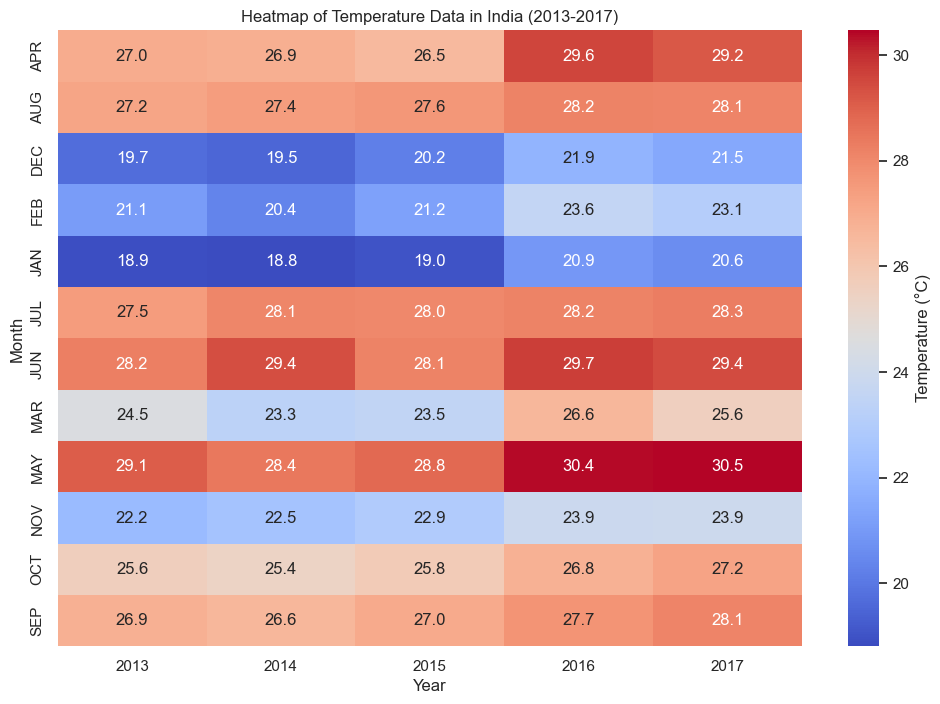

In [14]:
# creating heatmap about the temperature data in India from 2013 to 2017
# Pivot the filtered data to create a heatmap
heatmap_data = filtered_data.pivot(index="month", columns="YEAR", values="value")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})
plt.title('Heatmap of Temperature Data in India (2013-2017)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [15]:

# Create a long format dataframe for seasonal data
seasonal_df_long = pd.melt(seasonal_df, id_vars='Year', value_vars=seasonal_df.columns[1:])
seasonal_df_long.columns = ['Year', 'Season', 'Temperature']

# Ensure the 'Temperature' column is numeric
seasonal_df_long['Temperature'] = pd.to_numeric(seasonal_df_long['Temperature'], errors='coerce')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Weather Data Analysis Dashboard"),

    # Dropdown for selecting the season and show weather data
    dcc.Dropdown(
        id='season-dropdown',
        options=[{'label': season, 'value': season} for season in seasonal_df_long['Season'].unique()],
        value='Winter',
        clearable=False
    ),

    # Graph for mean temperature per year and season
    dcc.Graph(id='mean-temp-graph'),

    # Data table for average data
    html.H2("Average Temperature by Season"),
    dash_table.DataTable(
        id='average-data-table',
        columns=[
            {'name': 'Season', 'id': 'Season'},
            {'name': 'Average Temperature (°C)', 'id': 'Temperature'}
        ],
        data=seasonal_df_long.groupby('Season')['Temperature'].mean().reset_index().to_dict('records'),
        style_cell={'textAlign': 'left'},
        style_header={'fontWeight': 'bold'}
    ),

    # Additional analysis
    html.H2("Yearly Mean Temperature Over Time"),
    dcc.Graph(figure=fig_yearly_mean),

    html.H2("Temperature Throughout Time"),
    dcc.Graph(figure=fig_yearly_mean),  # Reusing fig_yearly_mean for demonstration

    html.H2("Temperature by Year"),
    dcc.Graph(figure=fig_yearly_mean),  # Reusing fig_yearly_mean for demonstration

    html.H2("Temperature Over Time"),
    dcc.Graph(figure=fig_scatter),

    html.H2("Summary Statistics"),
    html.Div([
        html.P(f"Coldest Year: {coldest_year}"),
        html.P(f"Hottest Year: {hottest_year}"),
        html.P(f"Year with Least Standard Deviation: {least_std_year}"),
        html.P(f"Month with the Warmest Day: {warmest_month}")
    ])
])

# Define the callback to update the graph based on selected season
@app.callback(
    Output('mean-temp-graph', 'figure'),
    Input('season-dropdown', 'value')
)
def update_graph(selected_season):
    filtered_df = seasonal_df_long[seasonal_df_long['Season'] == selected_season]
    fig = px.line(
        filtered_df,
        x='Year',
        y='Temperature',
        title=f'Mean Temperature Per Year - {selected_season}',
        markers=True
    )
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Temperature (°C)',
        template='plotly_dark'
    )
    return fig

# Run the app 
if __name__ == '__main__':
    app.run_server(debug=True)


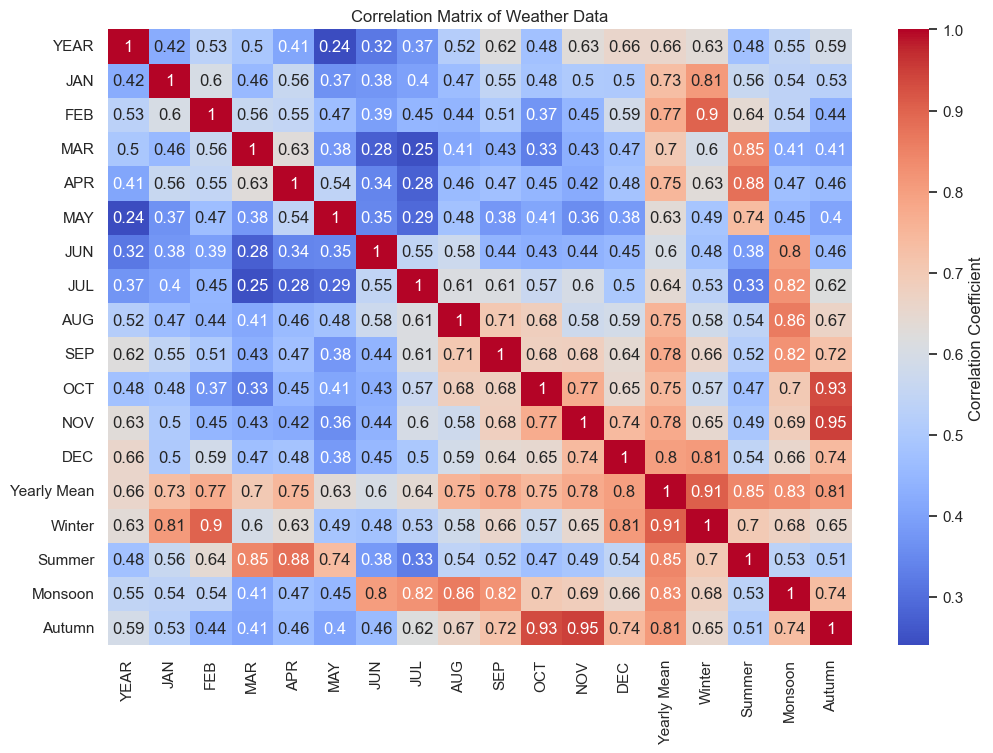

In [16]:

# Calculating the correlation matrix for the weather data
correlation_matrix = weather_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Weather Data')
plt.show()